In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.datasets import mnist
from numpy import reshape
from sklearn.decomposition import PCA
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[0:10000]
y_train = y_train[0:10000]

#train_filter = np.where((y_train == 0 ) | (y_train == 4))
#test_filter = np.where((y_train == 0) | (y_train == 4))

#x_train, y_train = x_train[train_filter], y_train[train_filter]
#x_test, y_test = x_test[test_filter], y_test[test_filter]

train_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
test_mnist = reshape(x_test, [x_test.shape[0], x_test.shape[1] * x_test.shape[2]])

In [ ]:
from sklearn.preprocessing import StandardScaler
# PCA prejection on n components for training data
scaler = StandardScaler()
scaler.fit(train_mnist)
train_mnist = scaler.transform(train_mnist)

pca = PCA(n_components=500)
transformed_train_data = pca.fit_transform(train_mnist)


#print(train_mnist[0])
#print(transformed_train_data[0])

In [ ]:
# PCA prejection on n components for test data

scaler = StandardScaler()
scaler.fit(test_mnist)
test_mnist = scaler.transform(test_mnist)

pca = PCA(n_components=500)
transformed_test_data = pca.fit_transform(test_mnist) # transformed_test_data

#print(test_mnist[0])
#print(transformed_test_data[0])

In [ ]:
lsvc = LinearSVC(verbose=0)

# optimize parameters: C and gamma....
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()

In [ ]:
#lsvc.fit(transformed_train_data, y_train)
#y_pred = lsvc.predict(transformed_test_data)

lsvc.fit(train_mnist, y_train)
y_pred = lsvc.predict(test_mnist) # hier sollte eigentlich test_mnist sein.

cm = confusion_matrix(y_test, y_pred) # hier sollte eigentlich y_test sein
print(cm)


[[ 933    0    8    4    1    6   17    3    7    1]
 [   2 1095    5    1    1    1    6    2   21    1]
 [  11   17  813   33   13    9   31   20   84    1]
 [   6    1   24  856    4   28    4   18   64    5]
 [   4    5    9    4  858    5   15   24   36   22]
 [  18    3    3   74   12  652   27   10   90    3]
 [  17    3   13    2   10   22  875    1   15    0]
 [   1    9   23    5   10    6    2  927   26   19]
 [   9   23   11   28   10   37   16   13  821    6]
 [  10   11    4   22   80   14    2   85  145  636]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       980
           1       0.94      0.96      0.95      1135
           2       0.89      0.79      0.84      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.84      0.73      0.78       892
           6       0.88      0.91      0.90       958
           7       0.84      0.90      0.87      1028
           8       0.63      0.84      0.72       974
           9       0.92      0.63      0.75      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.86      0.85      0.85     10000



<ipython-input-59-80bc501b1975>:14: RuntimeWarning: invalid value encountered in double_scalars
  y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
<ipython-input-59-80bc501b1975>:14: RuntimeWarning: divide by zero encountered in double_scalars
  y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points


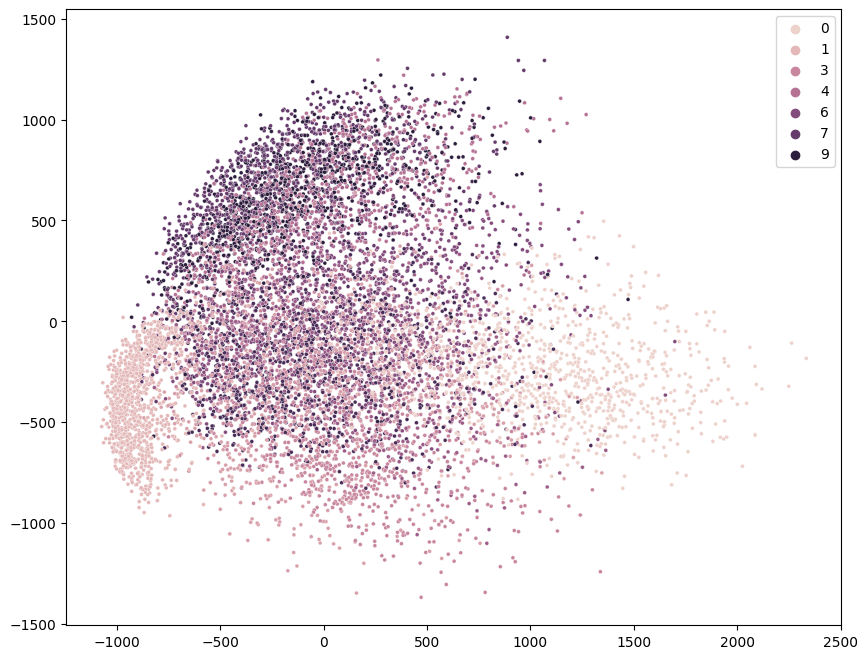

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=transformed_train_data[:, 0], 
                y=transformed_train_data[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = lsvc.coef_[0]           # w consists of 2 elements
b = lsvc.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');